In [1]:
pip install pandas-profiling[notebook,html]

Note: you may need to restart the kernel to use updated packages.


In [3]:
%matplotlib inline

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from numpy import random, float64, array
import numpy as np
import seaborn as sns
from pandas_profiling import ProfileReport
from pandas_profiling import ProfileReport

In [4]:
data=pd.read_csv(r"C:\Users\hp\Downloads\Airlines.csv")
data

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

In [23]:
profile= ProfileReport(data, title=" Airlines Data")
profile

Summarize dataset:   0%|          | 0/5 [00:01<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Hierarchial Clustering

In [5]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [7]:
data.shape

(3999, 12)

In [8]:
data1=data.drop(['ID#'],axis=1)
data1

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
4       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 11 columns]

In [9]:
#Normalize the data
def norm_func(i):
    x= (i-i.min())/(i.max()-i.min())
    return(x)

In [11]:
#Normalized data frame
df_norm1= norm_func(data1)
df_norm1

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0     0.016508         0.0       0.00        0.0        0.0     0.000660   
1     0.011288         0.0       0.00        0.0        0.0     0.000815   
2     0.024257         0.0       0.00        0.0        0.0     0.015636   
3     0.008667         0.0       0.00        0.0        0.0     0.001896   
4     0.057338         0.0       0.75        0.0        0.0     0.164211   
...        ...         ...        ...        ...        ...          ...   
3994  0.010837         0.0       0.00        0.0        0.0     0.032330   
3995  0.037766         0.0       0.00        0.0        0.0     0.003720   
3996  0.043169         0.0       0.50        0.0        0.0     0.096505   
3997  0.032202         0.0       0.00        0.0        0.0     0.001896   
3998  0.001769         0.0       0.00        0.0        0.0     0.000000   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0        0.011628           0.000000         0.000000           0.843742   
1        0.023256           0.000000         0.000000           0.839884   
2        0.046512           0.000000         0.000000           0.847842   
3        0.011628           0.000000         0.000000           0.837955   
4        0.302326           0.067398         0.075472           0.835905   
...           ...                ...              ...                ...   
3994     0.046512           0.006490         0.018868           0.168917   
3995     0.058140           0.000000         0.000000           0.167953   
3996     0.093023           0.000000         0.000000           0.168797   
3997     0.011628           0.016225         0.018868           0.168676   
3998     0.000000           0.000000         0.000000           0.168314   

      Award?  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        1.0  
...      ...  
3994     1.0  
3995     1.0  
3996     1.0  
3997     0.0  
3998     0.0  

[3999 rows x 11 columns]

In [12]:
df_norm1.describe()

Balance   Qual_miles    cc1_miles    cc2_miles    cc3_miles  \
count  3999.000000  3999.000000  3999.000000  3999.000000  3999.000000   
mean      0.043172     0.012927     0.264879     0.007252     0.003063   
std       0.059112     0.069399     0.344230     0.073825     0.048810   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.010868     0.000000     0.000000     0.000000     0.000000   
50%       0.025279     0.000000     0.000000     0.000000     0.000000   
75%       0.054201     0.000000     0.500000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count  3999.000000  3999.000000        3999.000000      3999.000000   
mean      0.065020     0.134906           0.014929         0.025917   
std       0.091590     0.111672           0.045436         0.071569   
min       0.000000     0.000000           0.000000         0.000000   
25%       0.004741     0.034884           0.000000         0.000000   
50%       0.027195     0.139535           0.000000         0.000000   
75%       0.090261     0.197674           0.010092         0.018868   
max       1.000000     1.000000           1.000000         1.000000   

       Days_since_enroll       Award?  
count        3999.000000  3999.000000  
mean            0.496330     0.370343  
std             0.248991     0.482957  
min             0.000000     0.000000  
25%             0.280685     0.000000  
50%             0.493610     0.000000  
75%             0.697914     1.000000  
max             1.000000     1.000000

In [13]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram

In [14]:
z1 = linkage(df_norm1, method="complete",metric="euclidean")

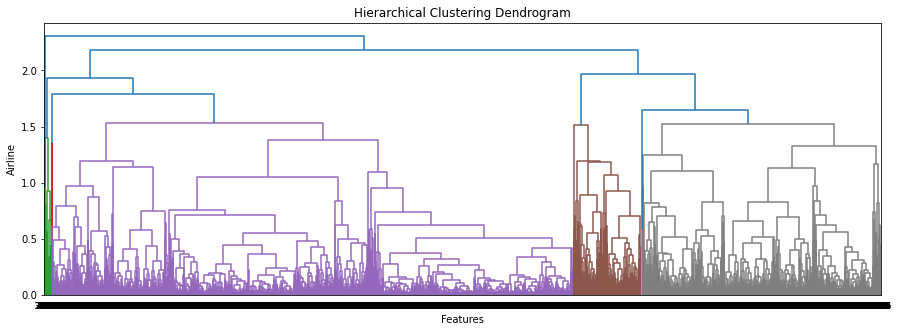

In [15]:
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Features')
plt.ylabel('Airline')
sch.dendrogram(z1,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [16]:
data1.corr

<bound method DataFrame.corr of       Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
4       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_e

In [17]:
#create clusters
hclusters=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='complete')
hclusters

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [18]:
y_hclusters=pd.DataFrame(hclusters.fit_predict(df_norm1),columns=['clustersid'])
y_hclusters

clustersid
0              0
1              0
2              0
3              0
4              1
...          ...
3994           2
3995           2
3996           2
3997           0
3998           0

[3999 rows x 1 columns]

In [19]:
y_hclusters['clustersid'].value_counts()

0    2495
2    1144
1     325
4      31
3       4
Name: clustersid, dtype: int64

In [20]:
#adding clusters to dataset
data1['clustersid']=hclusters.labels_
data1

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
4       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  clustersid  
0          0           0  
1          0           0  
2          0           0  
3          0           0  
4          1           1  
...      ...         ...  
3994       1           2  
3995       1           2  
3996       1           2  
3997       0           0  
3998       0           0  

[3999 rows x 12 columns]

In [21]:
data1.groupby('clustersid').agg(['mean']).reset_index()

clustersid        Balance  Qual_miles cc1_miles cc2_miles cc3_miles  \
                       mean        mean      mean      mean      mean   
0          0   59968.433667   88.883768  1.712224  1.000401  1.011222   
1          1  157084.578462  208.673846  4.661538  1.000000  1.061538   
2          2   80173.963287  248.550699  2.104895  1.009615  1.000874   
3          3  131999.500000  347.000000  2.500000  1.000000  1.000000   
4          4   45515.064516   32.258065  1.000000  2.483871  1.000000   

    Bonus_miles Bonus_trans Flight_miles_12mo Flight_trans_12  \
           mean        mean              mean            mean   
0  10271.530261    9.105812        227.797194        0.656112   
1  70477.086154   23.249231       1019.433846        3.196923   
2  16882.864510   13.412587        739.958916        2.236888   
3  65634.250000   69.250000      19960.000000       49.250000   
4  14618.870968   16.129032        443.225806        1.967742   

  Days_since_enroll    Award?  
               mean      mean  
0       3825.392786  0.000802  
1       5770.572308  1.000000  
2       4304.383741  1.000000  
3       2200.250000  1.000000  
4       3784.258065  0.193548

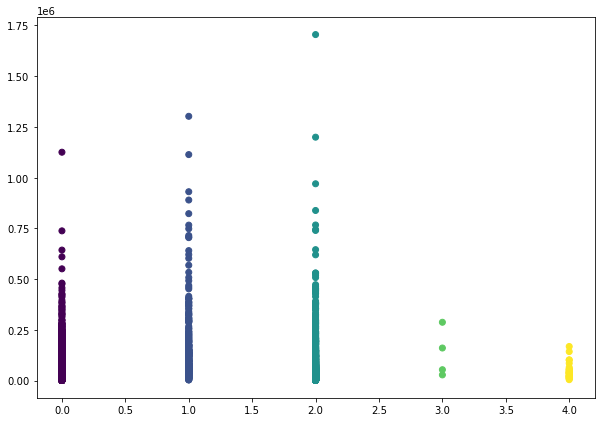

In [22]:
#plot clusters
plt.figure(figsize=(10, 7))
plt.scatter(data1['clustersid'],data1['Balance'], c=hclusters.labels_)